#### Q1(a)  Import the necessary packages.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from sklearn.preprocessing import StandardScaler

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### (b) Import the reuters dataset with the following line of code:

In [19]:
from tensorflow.keras.datasets import reuters

#### (c) Split the datasets into training and test sets with the following line of code. Specify the num_words = 500, and size of test set = 0.2.(num_words: the most common words appearing in the reuters news.)

In [20]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=500, test_split=0.2)

In [21]:
x_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 2, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 2, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 2, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 2, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 2, 2, 8, 7, 10, 241, 16, 2, 129, 231, 2, 5, 4, 2, 2, 2, 2, 2, 7, 48, 34, 191, 44, 35, 2, 2, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 2, 32, 2, 15, 14, 272, 26, 39, 2, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 2, 15, 14, 19, 2, 15, 53, 2, 47, 2, 15, 14, 19, 132, 15, 39, 2, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 2, 4, 78, 13, 68, 467, 2, 110, 59, 89, 90, 67, 2, 55, 2, 92, 2, 80, 2, 46, 2, 220, 13, 4, 346, 48, 235, 2, 5, 211, 5, 2, 7, 2, 8

#### (d) We don’t need to create word tokens since the words in the news are already converted into word indices. Pad the sequences so the all sequences have the same length. Set the length = 100.

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#word_index = reuters.word_index
sequences = np.array(x_train)
padded = pad_sequences(sequences,maxlen=100,padding="pre")

test_sequences = np.array(x_test)
test_padded = pad_sequences(test_sequences,maxlen=100,padding="pre")

#### (e) One hot encode y_train and y_test. There are 46 categories.

In [26]:
from tensorflow.keras.utils import to_categorical
y_train_final = to_categorical(y_train, 46)
y_test_final = to_categorical(y_test, 46)

#### (f) (i)  Build a Sequential neural network.

In [34]:
model = keras.Sequential([
    layers.Embedding(500, 32, input_length=100),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

#### (ii)   compile the neural network.

In [35]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### (iii)  Fit the model on training set. Use x_test and y_test_final as your validation_data. epochs = 10, batch_size = 32

In [41]:
history = model.fit(
    padded, y_train_final,
    validation_data=(test_padded,y_test_final),
    epochs=10, 
    batch_size=32,
)

Epoch 1/10
281/281 [==============================] - 3s 10ms/step - loss: 0.5415 - accuracy: 0.8704 - val_loss: 1.4949 - val_accuracy: 0.6665
Epoch 2/10
281/281 [==============================] - 3s 9ms/step - loss: 0.2683 - accuracy: 0.9413 - val_loss: 1.5737 - val_accuracy: 0.6612
Epoch 3/10
281/281 [==============================] - 3s 9ms/step - loss: 0.2224 - accuracy: 0.9477 - val_loss: 1.6950 - val_accuracy: 0.6483
Epoch 4/10
281/281 [==============================] - 3s 10ms/step - loss: 0.1948 - accuracy: 0.9520 - val_loss: 1.6628 - val_accuracy: 0.6616
Epoch 5/10
281/281 [==============================] - 3s 10ms/step - loss: 0.1790 - accuracy: 0.9517 - val_loss: 1.6804 - val_accuracy: 0.6607
Epoch 6/10
281/281 [==============================] - 3s 9ms/step - loss: 0.1769 - accuracy: 0.9498 - val_loss: 1.7105 - val_accuracy: 0.6541
Epoch 7/10
281/281 [==============================] - 3s 10ms/step - loss: 0.1611 - accuracy: 0.9534 - val_loss: 1.7381 - val_accuracy: 0.6558
Ep

In [45]:
test_loss, test_acc = model.evaluate(test_padded,  y_test_final, verbose=2)

71/71 - 0s - loss: 1.7135 - accuracy: 0.6558


#### (iv) Plot the values of training loss and validation loss over epochs. Use another graph to plot the values of training accuracy and validation accuracy over epochs.

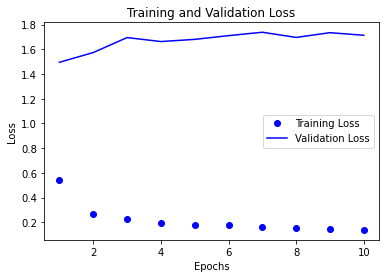

In [42]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

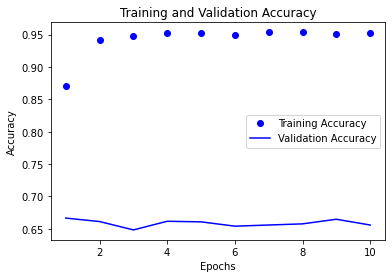

In [43]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### (g) (i)  Build a Sequential neural network.

In [46]:
model = keras.Sequential([
    layers.Embedding(500, 32, input_length=100),
    layers.LSTM(32),
    layers.Dense(512, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

#### (ii)   compile the neural network.

In [47]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### (iii)  Fit the model on training set. Use x_test and y_test as your validation_data. epochs = 30, batch_size = 32

In [48]:
history = model.fit(
    padded, y_train_final,
    validation_data=(test_padded,y_test_final),
    epochs=30, 
    batch_size=32,
)

Epoch 1/30
281/281 [==============================] - 9s 26ms/step - loss: 2.6439 - accuracy: 0.3620 - val_loss: 1.8315 - val_accuracy: 0.5463
Epoch 2/30
281/281 [==============================] - 7s 23ms/step - loss: 1.7415 - accuracy: 0.5407 - val_loss: 1.7769 - val_accuracy: 0.5392
Epoch 3/30
281/281 [==============================] - 7s 24ms/step - loss: 1.6548 - accuracy: 0.5625 - val_loss: 1.6491 - val_accuracy: 0.5779
Epoch 4/30
281/281 [==============================] - 7s 24ms/step - loss: 1.5534 - accuracy: 0.5977 - val_loss: 1.5319 - val_accuracy: 0.6140
Epoch 5/30
281/281 [==============================] - 7s 23ms/step - loss: 1.3950 - accuracy: 0.6403 - val_loss: 1.4640 - val_accuracy: 0.6371
Epoch 6/30
281/281 [==============================] - 7s 23ms/step - loss: 1.3080 - accuracy: 0.6605 - val_loss: 1.3861 - val_accuracy: 0.6483
Epoch 7/30
281/281 [==============================] - 7s 23ms/step - loss: 1.2768 - accuracy: 0.6747 - val_loss: 1.3719 - val_accuracy: 0.6492

In [49]:
test_loss, test_acc = model.evaluate(test_padded,  y_test_final, verbose=2)

71/71 - 0s - loss: 1.3528 - accuracy: 0.6937


#### (iv) Plot the values of training loss and validation loss over epochs. Use another graph to plot the values of training accuracy and validation accuracy over epochs.

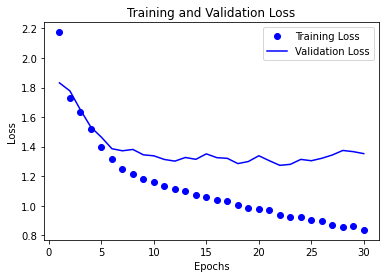

In [50]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

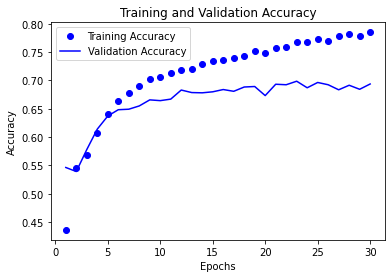

In [51]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()